In [3]:
import sys
sys.path.append('/home/pshah/Documents/code/PackerLab_pycharm/')
sys.path.append('/home/pshah/Documents/code/')

import alloptical_utils_pj as aoutils


# Step #1) in all optical experiment analysis - preprocessing the data to prep for suite2p analysis and creating some starter experiment objects




----------------------------------------
-----Processing trial # t-018------
----------------------------------------


***** CREATING NEW TwoPhotonImaging with the following metainfo:  {'animal prep.': 'RL109', 'trial': 't-018', 'date': '2020-12-19', 'exptype': 'post 4ap 2p all optical', 'data_path_base': '/home/pshah/mnt/qnap/Data/2020-12-19', 'comments': '2 sz within photostim, 2nd one possible with CSD + 1 sz at the end with CSD; 9 x 4 groups, same as t013. less number of clear responding cells on STA', 'pre4ap_trials': ['t-007', 't-008', 't-011', 't-012', 't-013', 't-014'], 'post4ap_trials': ['t-016', 't-017', 't-018', 't-019', 't-020', 't-021']}
\- Saving expobj saved to /home/pshah/mnt/qnap/Analysis/2020-12-19/RL109/2020-12-19_t-018/2020-12-19_t-018.pkl -- 

-----parsing PV Metadata (Nothing in this function right now though... it has been refactored in properties)
\- Saving expobj saved to /home/pshah/mnt/qnap/Analysis/2020-12-19/RL109/2020-12-19_t-018/2020-12-19_t-018.pkl -- 


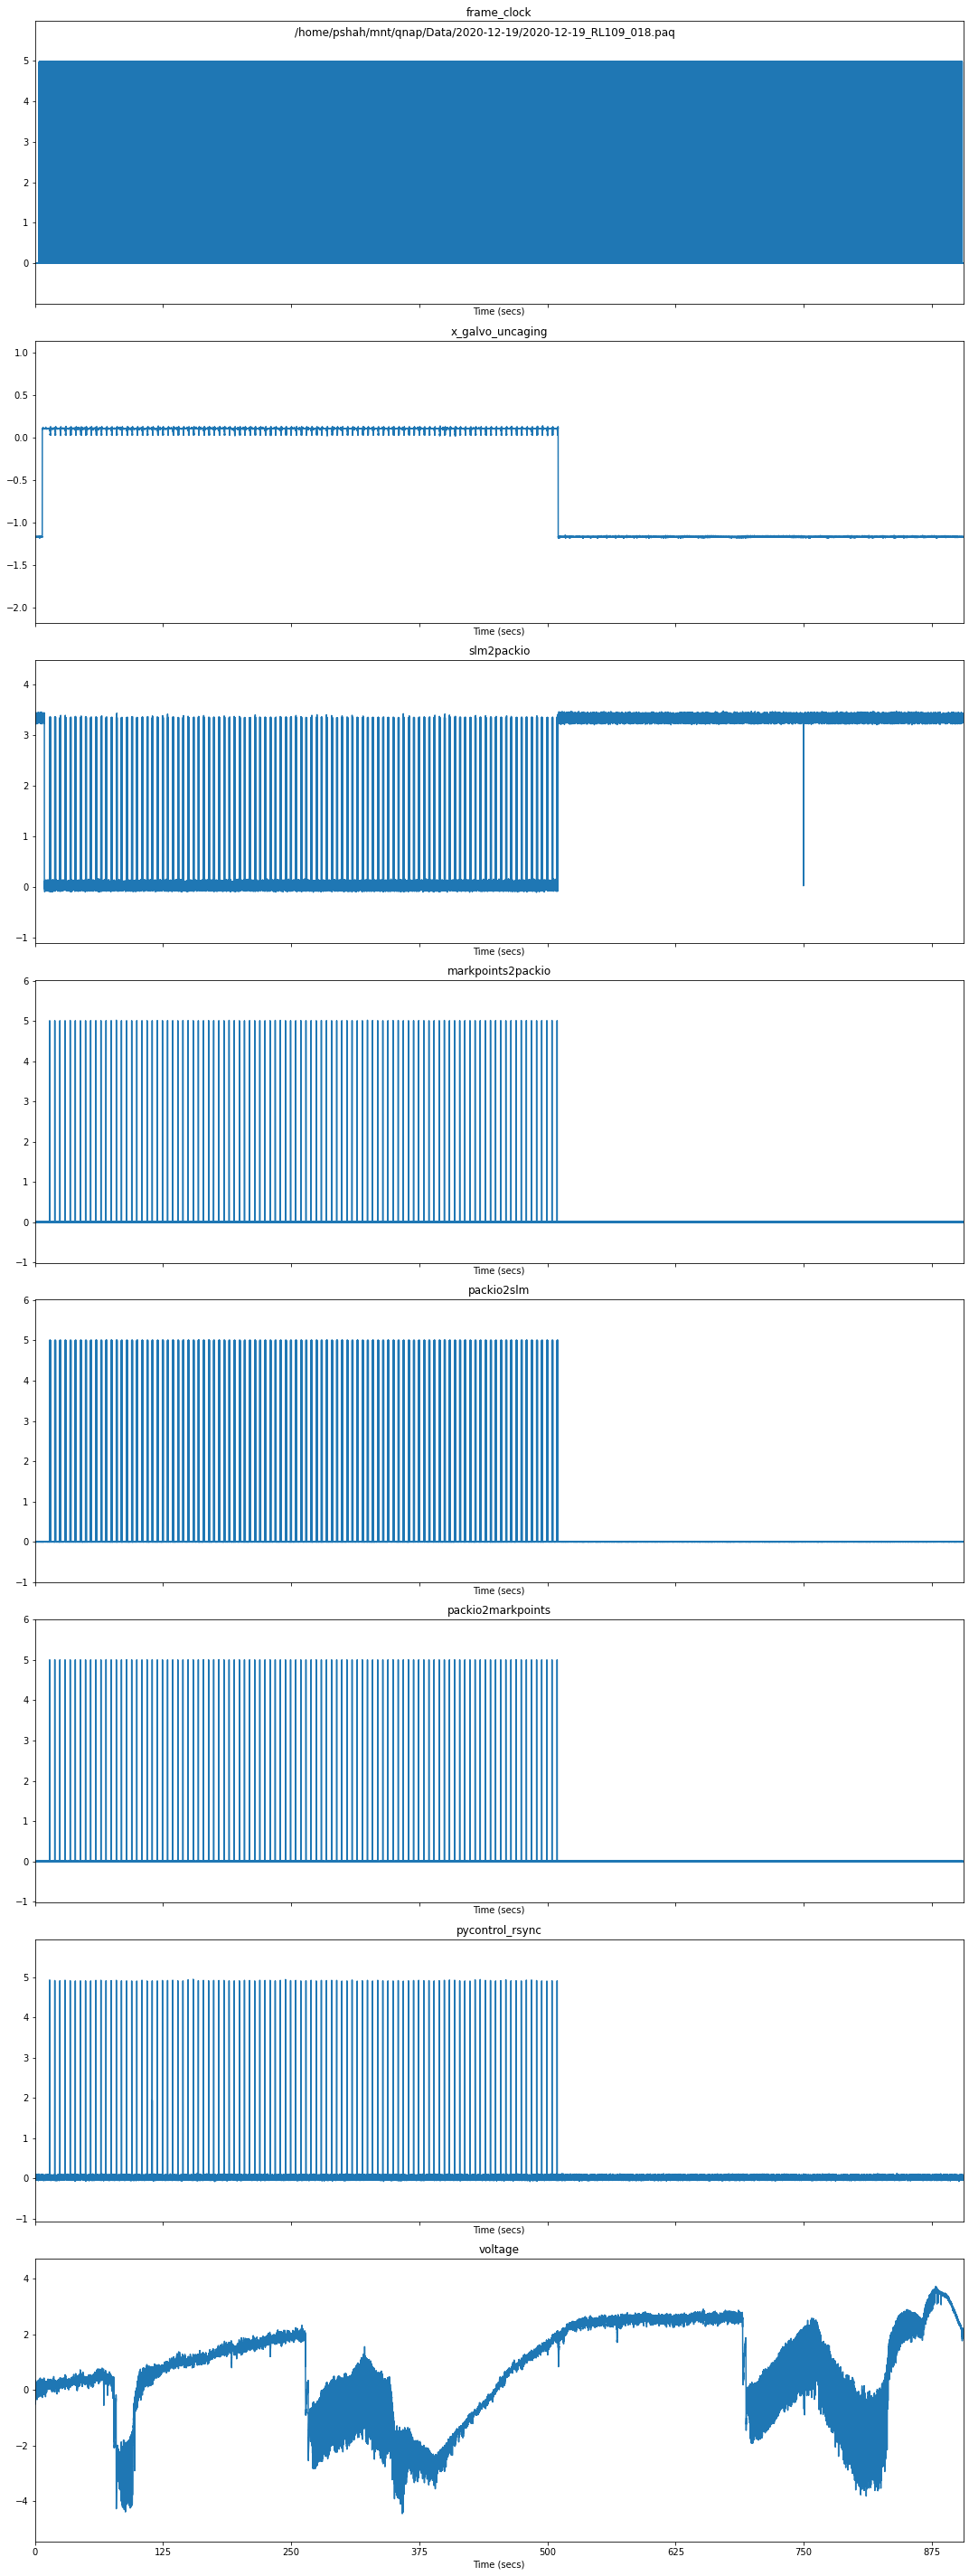

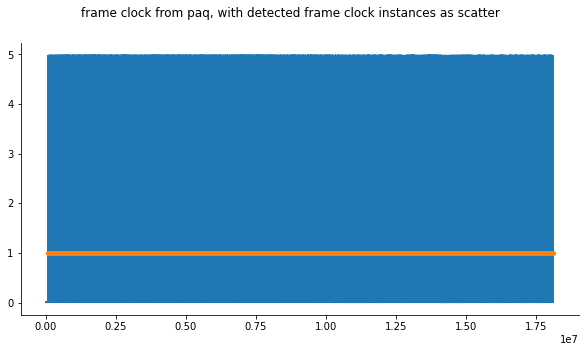

# of stims found on markpoints2packio: 100


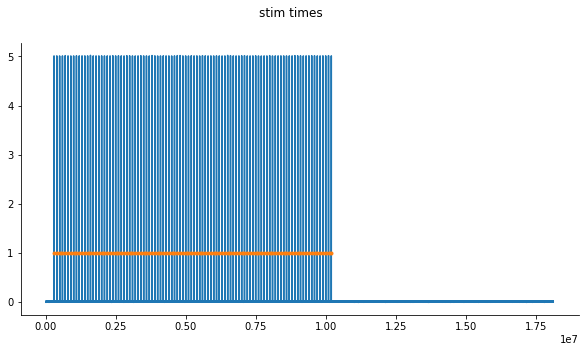


-----Loading up target coordinates...
Number of targets: 36
spiral size: 10.0um
pix sz x: 2.18458479264539um
radius (in pixels): 6.55px
radius of target exclusion zone (in pixels): 8.74px
Number of targets (in SLM group 1):  9
Number of targets (in SLM group 2):  9
Number of targets (in SLM group 3):  9
Number of targets (in SLM group 4):  9
FIN. -----Loading up target coordinates-----

-----calculating photostimulation frames...
# of photostim frames calculated per stim. trial:  32
|-- Original # of frames: 26784 frames
|-- # of Photostim frames: 3200 frames
|-- Minus photostim. frames total: 23584 frames
\- Saving expobj saved to /home/pshah/mnt/qnap/Analysis/2020-12-19/RL109/2020-12-19_t-018/2020-12-19_t-018.pkl -- 

initialized Post4ap expobj of exptype and trial: post 4ap 2p all optical, t-018, 2020-12-19

collecting information about seizures...
-- using matlab array to collect seizures /home/pshah/mnt/qnap/Analysis/2020-12-19/paired_measurements/2020-12-19_RL109_018.mat: 

addi

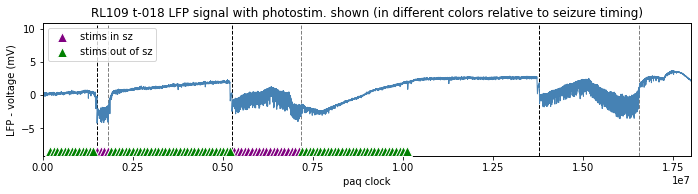

In [4]:

# 1) ### prepare trial and photostim experiment information below before running run_photostim_processing()
data_path_base = '/home/pshah/mnt/qnap/Data/2020-12-19'
animal_prep = 'RL109'
# date = '2021-02-02'
date = data_path_base[-10:]
# specify location of the naparm export for the trial(s) - ensure that this export was used for all trials, if # of trials > 1
# paqs_loc = '%s/%s_RL109_%s.paq' % (data_path_base, date, trial[2:])  # path to the .paq files for the selected trials

# need to update these 4 things for every trial
trial = 't-018'  # note that %s magic command in the code below will be using these trials listed here
comments = '2 sz within photostim, 2nd one possible with CSD + 1 sz at the end with CSD; 9 x 4 groups, same as t013. less number of clear responding cells on STA'
naparms_loc = '/photostim/2020-12-19_RL109_ps_014/'  # make sure to include '/' at the end to indicate the child directory
exp_type = 'post 4ap 2p all optical'  # use 'post' and '4ap' in the description to create the appropriate run_post4ap_trials exp object
analysis_save_path = f'/home/pshah/mnt/qnap/Analysis/{date}/{animal_prep}/{date}_{trial}'

pre4ap_trials = ['t-007', 't-008', 't-011', 't-012', 't-013', 't-014']  # add all optical t-series from pre4ap_trials
post4ap_trials = ['t-016', 't-017', 't-018', 't-019', 't-020', 't-021']  # add all optical t-series from post4ap_trials


######

## everything below should autopopulate and run automatically
paqs_loc = '%s/%s_%s_%s.paq' % (data_path_base, date, animal_prep, trial[2:])  # path to the .paq files for the selected trials
# tiffs_loc_dir = '%s/%s_%s' % (data_path_base, date, trial)
# tiffs_loc = '%s/%s_%s_Cycle00001_Ch3.tif' % (tiffs_loc_dir, date, trial)
tiffs_loc = f'{data_path_base}/{date}_{trial}/{date}_{trial}_Cycle00001_Ch3.tif'
# pkl_path = "%s/%s_%s.pkl" % (analysis_save_path, date, trial)  # specify path in Analysis folder to save pkl object
# paqs_loc = '%s/%s_RL109_010.paq' % (data_path_base, date)  # path to the .paq files for the selected trials
new_tiffs = tiffs_loc[:-19]  # where new tiffs from rm_artifacts_tiffs will be saved
# make the necessary Analysis saving subfolder as well
# analysis_save_path = tiffs_loc[:21] + 'Analysis/' + tiffs_loc_dir[26:]

if 'post' in exp_type and 'no seizure' not in comments:
    matlab_pairedmeasurement_path = '%s/paired_measurements/%s_%s_%s.mat' % (analysis_save_path[:-23], date, animal_prep, trial[2:])  # choose matlab path if need to use or use None for no additional bad frames
else:
    matlab_pairedmeasurement_path = None


metainfo = {
    'animal prep.': animal_prep,
    'trial': trial,
    'date': date,
    'exptype': exp_type,
    'data_path_base': data_path_base,
    'comments': comments,
    'pre4ap_trials': pre4ap_trials,
    'post4ap_trials': post4ap_trials
}


expobj = aoutils.run_photostim_preprocessing(trial, exp_type=exp_type, tiffs_loc=tiffs_loc,
                                             naparms_loc=(data_path_base + naparms_loc), paqs_loc=paqs_loc,
                                             metainfo=metainfo, new_tiffs=new_tiffs,
                                             matlab_pairedmeasurements_path=matlab_pairedmeasurement_path,
                                             processed_tiffs=False, discard_all=True,
                                             analysis_save_path=analysis_save_path)


